1. DOWNLOAD THE DATASET

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. LOADING THE DATA SET

In [2]:
#loading the dataset into the dataflow
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
#information about the dataset
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


3. Perform below visualization

● Univariate Analysis

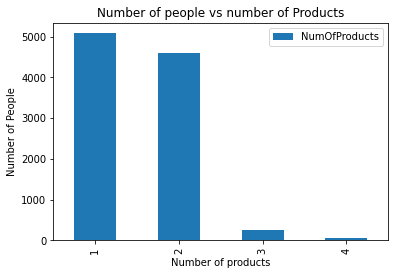

In [4]:
data=pd.DataFrame(df['NumOfProducts'].value_counts())
data.plot.bar()

plt.xlabel("Number of products")
plt.ylabel("Number of People")
plt.title("Number of people vs number of Products");


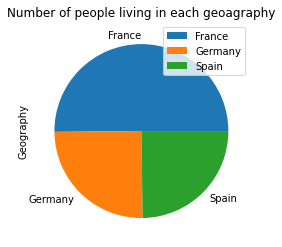

In [5]:
data=pd.DataFrame(df['Geography'].value_counts())
data.plot.pie(subplots='True')
plt.title("Number of people living in each geoagraphy");


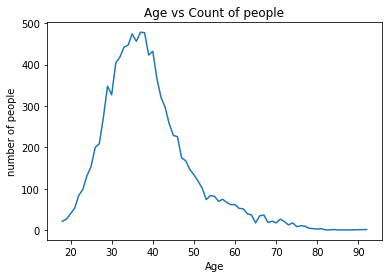

In [6]:
df['Age'].value_counts().sort_index().plot.line()
plt.xlabel("Age")
plt.ylabel("number of people")
plt.title("Age vs Count of people");

● Bivariate Analysis
● Multivariate Analysis

In [7]:
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

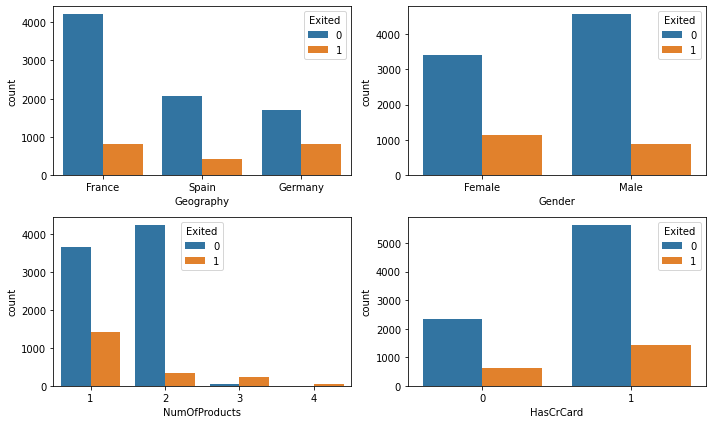

In [9]:
import seaborn as sns
categorical = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
rows = int(np.ceil(categorical.shape[1] / 2)) - 1

# create sub-plots anf title them
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col]
        ax = axes[row*2 + col]       

        sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax);
        
plt.tight_layout()

4. Perform descriptive statistics on the dataset.

In [10]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 654.8+ KB


In [11]:
#statistical analysis
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


5.Handle the Missing Values




In [12]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        print("Number of unique values of "+i+" are "+str(len(set(df[i])))+" Values are "+str(set(df[i])))

Number of unique values of Geography are 3 Values are {'Spain', 'France', 'Germany'}
Number of unique values of Gender are 2 Values are {'Male', 'Female'}
Number of unique values of HasCrCard are 2 Values are {0, 1}
Number of unique values of IsActiveMember are 2 Values are {0, 1}
Number of unique values of Exited are 2 Values are {0, 1}


6. Find the outliers and replace the outliers

In [15]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
EstimatedSalary    0.002085
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


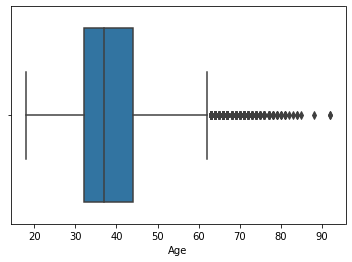

In [17]:
sns.boxplot(df["Age"])

In [18]:
q1= df["Age"].describe()["25%"]
q3= df["Age"].describe()["75%"]

In [19]:
q1

32.0

In [20]:
q3

44.0

In [21]:
iqr=q3-q1
iqr

12.0

In [22]:
l_b=q1-(1.5*iqr)
u_b=q3+(1.5*iqr)

In [23]:
l_b

14.0

In [24]:
u_b

62.0

In [25]:
df[df["Age"]<l_b]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [26]:
df[df["Age"]>u_b].head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,510,France,Male,65,2,0.00,2,1,1,48071.61,0


In [27]:
df.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [28]:
outlier_list=list(df[df["Age"]>u_b]["Age"])
outlier_list

[66,
 75,
 65,
 73,
 65,
 72,
 67,
 67,
 79,
 80,
 68,
 75,
 66,
 66,
 70,
 63,
 72,
 64,
 64,
 70,
 67,
 82,
 63,
 69,
 65,
 69,
 64,
 65,
 74,
 67,
 66,
 67,
 63,
 70,
 71,
 72,
 67,
 74,
 76,
 66,
 63,
 66,
 68,
 67,
 63,
 71,
 66,
 69,
 73,
 65,
 66,
 64,
 69,
 64,
 77,
 74,
 65,
 70,
 67,
 69,
 67,
 74,
 69,
 74,
 74,
 64,
 63,
 63,
 70,
 74,
 65,
 72,
 77,
 66,
 65,
 74,
 88,
 63,
 71,
 63,
 64,
 67,
 70,
 68,
 72,
 71,
 66,
 75,
 67,
 73,
 69,
 76,
 63,
 85,
 67,
 74,
 76,
 66,
 69,
 66,
 72,
 63,
 71,
 63,
 74,
 67,
 72,
 72,
 66,
 84,
 71,
 66,
 63,
 74,
 69,
 84,
 67,
 64,
 68,
 66,
 77,
 70,
 67,
 79,
 67,
 76,
 73,
 66,
 67,
 64,
 73,
 76,
 72,
 64,
 71,
 63,
 70,
 65,
 66,
 65,
 80,
 66,
 63,
 63,
 63,
 63,
 66,
 74,
 69,
 63,
 64,
 76,
 75,
 68,
 69,
 77,
 64,
 66,
 74,
 71,
 67,
 68,
 64,
 68,
 70,
 64,
 75,
 66,
 64,
 78,
 65,
 74,
 64,
 64,
 71,
 77,
 79,
 70,
 81,
 64,
 68,
 68,
 63,
 79,
 66,
 64,
 70,
 69,
 71,
 72,
 66,
 68,
 63,
 71,
 72,
 72,
 64,
 78,
 75,
 65,


In [29]:
outlier_dict={}.fromkeys(outlier_list,u_b)
outlier_dict

{66: 62.0,
 75: 62.0,
 65: 62.0,
 73: 62.0,
 72: 62.0,
 67: 62.0,
 79: 62.0,
 80: 62.0,
 68: 62.0,
 70: 62.0,
 63: 62.0,
 64: 62.0,
 82: 62.0,
 69: 62.0,
 74: 62.0,
 71: 62.0,
 76: 62.0,
 77: 62.0,
 88: 62.0,
 85: 62.0,
 84: 62.0,
 78: 62.0,
 81: 62.0,
 92: 62.0,
 83: 62.0}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


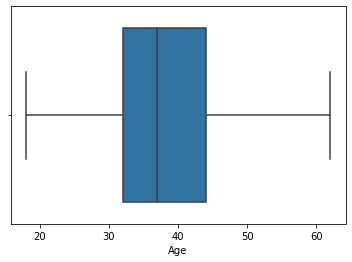

In [30]:
df["Age"]=df["Age"].replace(outlier_dict)
sns.boxplot(df["Age"])

7.Check for Categorical columns and perform encoding.

In [32]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=encoder.fit_transform(df[i])

8. Split the data into dependent and independent variables

In [38]:
x=df.iloc[:,:-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [39]:
y=df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

9. Scale the independent variables

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

10. Split the data into training and testing

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28)

In [45]:
x_train.shape

(7199, 10)

In [46]:
y_train.shape

(7199,)

In [47]:
x_test.shape

(2801, 10)

In [48]:
y_test.shape

(2801,)